# Домашнее Задание №2



*Выполнила: Колмакова Маргарита Павловна*

- Ниже приведены несколько датасетов, их необходимо проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее
- Сделать хорошую визуализацию исследуемых переменных
- Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
- Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
- Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Связанные выборки

### seattle
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('seattle.txt', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [ ]:
df.shape

(100, 2)

In [ ]:
df.isna().sum()
# в данных нет пропусков

Price    0
Year     0
dtype: int64

In [ ]:
df.groupby('Year')['Price'].describe()
# значение средней цены на недвижимость изменилось в 2002 году по сравнению с 2001, оно увеличилось с 288.9 до 329.3

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2001,50.0,288.92654,157.777757,50.0,190.25,260.800,406.7375,710.0
2002,50.0,329.25714,316.830045,50.0,176.20,244.925,328.6250,1850.0


In [ ]:
df.groupby('Year')['Price'].median()

Year
2001    260.800
2002    244.925
Name: Price, dtype: float64

**(1 БАЛЛ)**. Визуализируем значения цен (переменной `Price`) за 2001 и 2002 годы. Постройте несколько графиков (boxplot, violinplot). Сделайте выводы о том, как меняется распределение цены в зависимости от года. Сделайте выводы касательно среднего и дисперсии. Предположите, глядя на графики, изменилась ли цена?

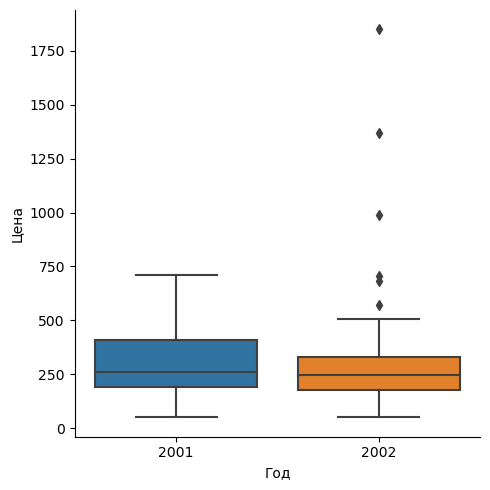

In [ ]:
sns.catplot(x = "Year", y = "Price", data=df, kind="box")
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

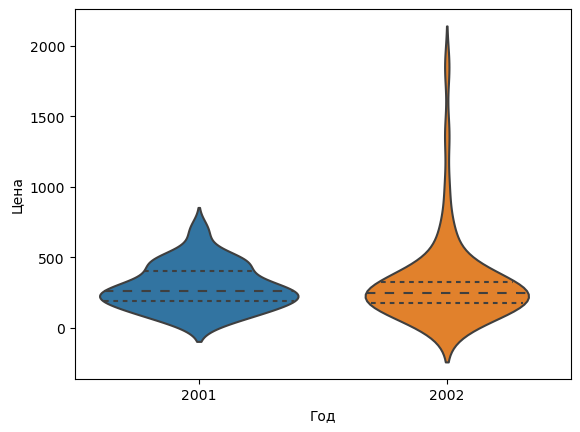

In [ ]:
sns.violinplot(x = "Year", y = "Price", data=df, inner="quartile")
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

**ВЫВОДЫ:**

Заметим, что распределение значений цен на недвижимость в 2001 и 2002 гг. разное:
1. Разброс (дисперсия) параметра Price в зависимости от года меняется: в 2001 не было сильных отклонений (выбросов), что можно легко заметить по графику boxplot - нет точек за пределами ящика с усами, когда в 2002 году появляются наблюдения, значения которых находятся за пределами верхней границы ящика (обычно это Q3 + 1,5IQR), то есть в 2002 году дисперсия увеличилась (оранжевый график violinplot так же показывает увеличение дисперсии - фигура более вытянутая).


2. Более того, значение среднего в 2002 году увеличилось, так как оно чувствительно к появившимся выбросам.


3. Медианное значение цены почти не изменилось - проведенная черта внутри обоих ящиков находится примерно на одинаковом уровне (медиана устойчива к выбросам).


4. Изменилась ли цена? Выборка, на основе которой построены графики, генерируется случайным образом, и изменение цены можно доказать, проверив гипотезы об изменении средней в генеральной совокупности или же получив всю генеральную совокупность. Визуально можем сказать, что разброс данных изменился и определенные сдвиги на графиках есть, что может говорить об изменении цены.

**(2 БАЛЛА)**. Сформулируйте нулевую и альтернативную гипотезу. Выберите $\alpha$. Обоснуйте свой выбор касательно альтернативы (одно- или двусторонняя гипотеза). Выберите критерий, которым Вы будете проверять гипотезу, выпишите его формулу и распределение, которому этот критерий подчиняется при справедливости нулевой гипотезы. Обоснуйте свой выбор. Постарайтесь красиво записать гипотезы (посмотрите в оформление ячеек из тетрадки с семинара по гипотезам)

МЕСТО ДЛЯ ВАШИХ ВЫВОДОВ И ГИПОТЕЗ

**Мне интересно узнать, изменилась ли в среднем цена недвижимости?**

Рассмотрим изменение цен на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 гг.
$$d_{i\ }=x_{i}-y_{i}$$

Дисперсия изменения:
$$
s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(d_{i}-\bar{d}\right)^{2}
$$

Буду использовать $t$-тест для проверки гипотезы об отсутствии изменения.

Обозначим **𝛼 = 0,05**

Сформулирую нулевую гипотезу:
$$
H_0:\hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm} \text{в среднем цена не изменилась}
\
$$

Альтернативная гипотеза:
$$
H_1:\hspace{2mm}\mu_1-\mu_2  \ne 0 \hspace{2mm} \text{есть различия}
\
$$


Предположим, мы не знаем про сильно отклоняющиеся значения в 2002 году, но мы хотим узнать изменилась ли в среднем цена на недвижимость за год, поэтому протестируем двустороннюю гипотезу и выявим значимо или нет изменение цены в среднем.

Критерий:
$$
t\ =\ \dfrac{\bar{d}-0}{\sqrt{\dfrac{s^{2}}{n}}}\sim t\left(n-1\right)
$$
заметим, что при справедливости нулевой гипотезы критерий имеет распределение Стьюдента с n-2 степенями свободы.

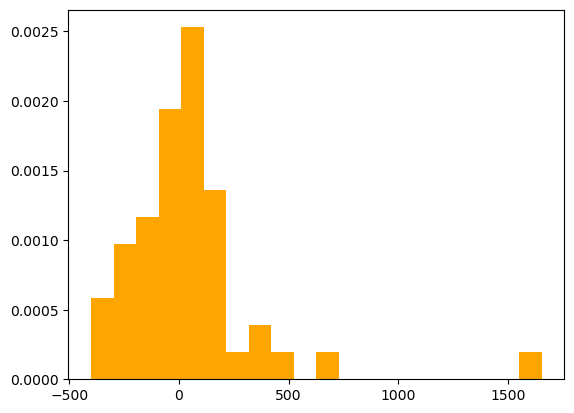

In [ ]:
d = np.array(df['Price'][:50]) - np.array(df['Price'][50:])
plt.hist(d, bins=20, density=True, color = "orange")
plt.show()

**Мы можем сказать, что распределение разности оценок похоже на нормальное ==> можем использовать t-тест.**

**(2 БАЛЛА)** Реализуйте Ваш критерий и сам механизм проверки гипотезы вручную. Сделайте вывод об отвержении или не отвержении гипотезы. Сравните свои результаты со встроенным тестом из пакета scipy.stats (если он там есть)

In [ ]:
# статистика и p-value для зависимых выборок
t_obs = d.mean()/np.sqrt(d.var(ddof=1)/d.size)
p_val = 2*(stats.t.cdf(-np.abs(t_obs), d.size-1))

print(t_obs, p_val)

0.9054576456583359 0.369653808711352


In [ ]:
# тест для зависимых выборок из пакета scipy.stats
x = df[df['Year']==2001]['Price']
y = df[df['Year']==2002]['Price']

stats.ttest_rel(x, y)

Ttest_relResult(statistic=-0.9054576456583359, pvalue=0.369653808711352)

In [ ]:
pvalue=0.369653808711352
alpha = 0.05
print(0.369653808711352 > 0.05)

True


МЕСТО ДЛЯ ВАШИХ ВЫВОДОВ

1. Мы **не отвергаем нулевую гипотезу** о равенстве средних, так как значение p-value оказалось больше альфа (0.37> 0.05). Разница значений средней цены в 2 рассмотренных года статистически незначима.


2. В генеральной совокупности средние значения цены в 2001 и 2002 гг. принимают одинаковые значения.



## Несвязанные выборки

### mtcars
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cyl — количество цилиндров мотора;
3. disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач;
11. carb — количество карбюраторов.



In [ ]:
df = pd.read_csv('mtcars.csv', index_col=0)
df.sample(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
manufacturer,,,,,,,,,,,
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [ ]:
df.shape

(32, 11)

Мы хотим ответить на следующие вопросы:

- Влияет ли тип двигателя на расход топлива?
- Влияет ли объем мотора на расход топлива?



**(1 БАЛЛ)**. Постройти графики для каждого вопроса. Для первого вопроса можете вновь использовать violinplot, но можете подобрать и другой график. Подумайте, какой график подходит для второго вопроса и нарисуйте его. Попробуйте сделать выводы на основе этих графиков (как распределены признаки, их средние и дисперсии).

In [ ]:
df.groupby('vs')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
vs,,,,,,,,
0,18.0,16.616667,3.860699,10.4,14.775,15.65,19.075,26.0
1,14.0,24.557143,5.378978,17.8,21.400,22.80,29.625,33.9


In [ ]:
df.groupby('vs')['mpg'].median()

vs
0    15.65
1    22.80
Name: mpg, dtype: float64

In [ ]:
df.groupby('vs')['mpg'].value_counts()

vs  mpg 
0   10.4    2
    15.2    2
    21.0    2
    13.3    1
    14.3    1
    14.7    1
    15.0    1
    15.5    1
    15.8    1
    16.4    1
    17.3    1
    18.7    1
    19.2    1
    19.7    1
    26.0    1
1   21.4    2
    22.8    2
    30.4    2
    17.8    1
    18.1    1
    19.2    1
    21.5    1
    24.4    1
    27.3    1
    32.4    1
    33.9    1
Name: mpg, dtype: int64

In [ ]:
df.groupby('vs')['mpg'].var()

vs
0    14.905000
1    28.933407
Name: mpg, dtype: float64

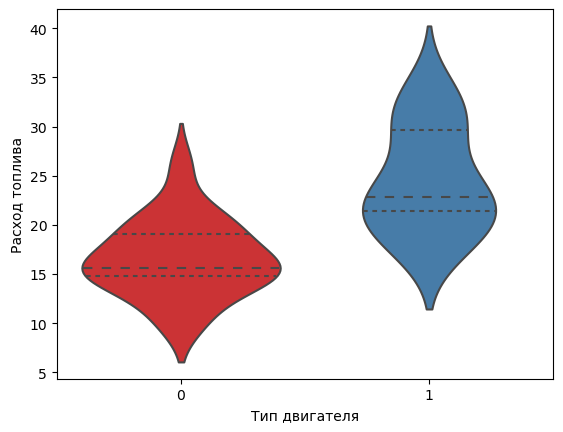

In [ ]:
sns.violinplot(x='vs',
               y='mpg',
               data=df,
               palette='Set1',
               inner="quartile")

plt.xlabel('Тип двигателя')
plt.ylabel('Расход топлива');
plt.show()

МЕСТО ДЛЯ ВАШИХ ВЫВОДОВ


**1. Влияет ли тип двигателя на расход топлива?** (0 = V-образный, 1 = рядный)

**Ответ: Да, влияет.**

По графику violinplot можно выявить, что двигатель типа 0 подразумевает меньший расход топлива, чем тип двигателя 1, так как violinplot для 0 располагается ниже, чем violinplot для 1. Медианное значений для типа 0 также находится ниже, чем у типа 1.

**Как распределены признаки, их средние и дисперсии?**

Можем сказать, что красная фигура для vs=0 шире, что говорит, что в выборке чаще встречается этот тип двигателя, чем тип двигателя 1. Синяя фигура для типа 1 (рядный) более вытянутая, и находится выше, чем график для типа 0, следовательно, и разброс данных расхода топлива этого типа, и среднее должно быть больше, чем  у V-образного типа (смещение вверх из-за наличия больших значений расхода топлива).


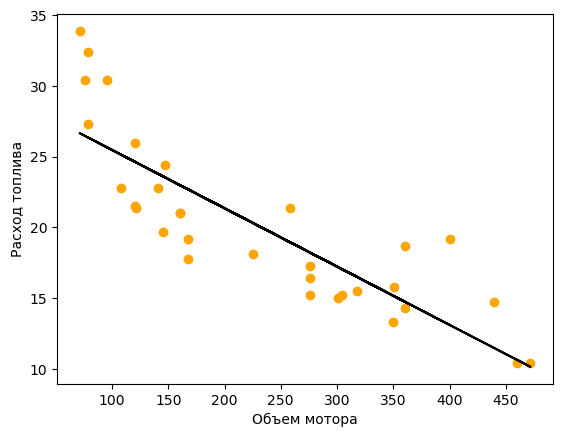

In [ ]:
# я выбрала диаграмму рассеивания, так как она лучше всего показывает зависимости между переменными
plt.scatter(df.disp, df.mpg, color= "orange")
plt.xlabel('Объем мотора')
plt.ylabel('Расход топлива')
z = np.polyfit (df.disp, df.mpg, 1)
p = np.poly1d (z)
plt.plot(df.disp, p(df.disp), color = 'black')
# добавлю линию тренда для большей наглядности зависимости расхода топлива от объема мотора

plt.show()

МЕСТО ДЛЯ ВАШИХ ВЫВОДОВ

**2. Влияет ли объем мотора на расход топлива?**

**Ответ: Да, влияет.**

Для демонстрации линейной зависимости между двумя переменными я выбрала диаграмму рассеивания, так как она лучше всего показывает зависимости между переменными.

Мы можем наблюдать обратную линейную зависимость между этими двумя переменными, то есть большему объему мотора соответствует меньший расход топлива, и наоборот, меньшему объему мотора соответствует больший расход топлива.

Построенная диаграмма рассеяния позволяется понять взаимосвязь между двумя переменными. Мы можем ее оценить по специфичному расположению точек на графике, и для большей наглядности можно сопоставить их расположение с выведенной линией тренда. По графику видно, что точки расположены нехаотично (есть облако) и довольно близко друг к другу, следовательно, корреляция между признаками есть. Отметим, что коэффициент корреляции отрицательный (взаимосвязь между признаками обратная).

**Как распределены признаки, их средние и дисперсии?**

По данному графику можно определить разброс данных (насколько близко точки находятся близко друг к другу), но точно оценить распределение и значения средних у признаков по диаграмме рассеяния нельзя, этот тип графика не предназначен для интерпретации данных характеристик.

**(2 БАЛЛА)**. Реализуйте решение для первого вопроса. Подумайте как можно измерить влияние типа двигателя на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

МЕСТО ДЛЯ ВАШИХ МЫСЛЕЙ И ГИПОТЕЗ

**1. Влияет ли тип двигателя на расход топлива?**

Введем обозначения:

y: mpg — расход топлива (миль/галлон)

x1: vs — тип двигателя (0 = V-образный, 1 = рядный)

В этой задаче нам нужно понять, влияет ли тип двигателя на расход топлива.
Попробуем использовать коэффициент корреляции Пирсона для тестирования гипотезы о зависимости между двумя переменными в генеральной совокупности (то есть коррелируют ли между собой признаки).

p(x1,y) - коэффициент корреляции Писона между типом двигателя (x) и расходом топлива(y) в генеральной совокупности.

**Сформулирую нулевую гипотезу:**

$$
H_0: p(x1,y)= 0 \
$$
$$
\text{В генеральной совокупности не существует зависимости между типом двигателя и расходом топлива.}
\
$$

**Альтернативная гипотеза:**

$$
H_1:p(x1,y) \ne 0\
$$
$$
\text{В генеральной совокупности существует зависимость между между типом двигателя и расходом топлива.}
\
$$

Пусть 𝛼 = 0.05

Будем проверять гипотезы с помощью t-теста, чтобы определить, является ли корреляция между признаками статистически значимой.

**Критерий:**

$t = \frac{r_{X, Y} \sqrt{n-2}}{\sqrt{1 - r^2_{X, Y}}} \sim T_{n-2}$, где

$T_{n-2}$ - распределение Стьюдента.

$r_{X, Y}$ - выборочный коэффициент корреляции Пирсона

$r_{X,Y} = \frac{\frac{1}{n} \sum \limits_{i=1}^n (x_i - \overline X)(y_i - \overline Y) }{ \sqrt{D^*_X D^*_Y}}$, где

$D^*_X = \frac{1}{n} \sum \limits_{i=1}^n (x_i - \overline X)^2$

$D^*_Y = \frac{1}{n} \sum \limits_{i=1}^n (y_i - \overline Y)^2$

In [ ]:
df.corr()
# по таблице мы видим, что коэффициент корреляции между типом двигателя (vs) и расходом топлива (mpg) равен 0.66

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [ ]:
# посчитаем руками коэффициент корреляции Пирсона
# для удобства создадим новый датафрейм, где будут находиться только 2 нужные мне переменные
df_1 = pd.concat([df.vs, df.mpg], axis = 1)
df_1.head()

,vs,mpg
manufacturer,,
Mazda RX4,0,21.0
Mazda RX4 Wag,0,21.0
Datsun 710,1,22.8
Hornet 4 Drive,1,21.4
Hornet Sportabout,0,18.7


In [ ]:
# считатем по формуле, которая приведена выше
df_1["X - Mx"] = df['vs'] - df['vs'].mean()
df_1["Y - My"]= df['mpg'] - df['mpg'].mean()

In [ ]:
SSx = (df_1["X - Mx"]**2).sum()
SSy = (df_1["Y - My"]**2).sum()
SP = (df_1["X - Mx"]*df_1["Y - My"]).sum()
r = SP/np.sqrt(SSx*SSy)
r
# коэффициент корреляции Пирсона - 0.66 (совпало с табличным значением)

0.6640389191275927

In [ ]:
# считаем наблюдаемую t-ститистику
n = df.shape[0]
t_obs = (r*np.sqrt(n-2))/(1-r**2)
t_obs

6.505815037966033

In [ ]:
# рассчитаем границы критической области
alpha = 0.05
left  = scipy.stats.t.ppf(alpha/2, n-2)
right = scipy.stats.t.ppf(1 - (alpha/2), n-2)
print(left, right)
# распределение Стьюдента симметричное

-2.042272456301238 2.0422724563012373


In [ ]:
print(abs(t_obs) > right)
# t наблюдаемое попадает в критическую область
# Н0 отвергается в пользу альтернативной гипотезы

True


In [ ]:
from scipy.stats import pearsonr
scipy.stats.pearsonr(df_1["vs"], df_1["mpg"], alternative='two-sided' )

PearsonRResult(statistic=0.6640389191275929, pvalue=3.4159372544199445e-05)

In [ ]:
print(3.4159372544199445e-05 < 0.05)

True


ВЫВОД:
1. Мы **отвергаем нулевую гипотезу** на уровне значимости 0.05, так как расчитанное t наблюдаемое попало в критическую область, следовательно, в генеральной совокупности существует зависимость между типом двигателя и расходом топлива. Расчитанный r(x1,y) значим на уровне значимости 0.05 (между признаками есть корреляционная связь).


2. Более того, воспользовавшись встроенной функцией pearsonr, мы доказали, что **p-value < alpha** (3.4159372544199445e-05 < 0.05), что также говорит, о том, что нулевая гипотеза отвергается в пользу альтернативной.


**(2 БАЛЛА)**. Реализуйте решение для второго вопроса. Подумайте как можно измерить влияние объема мотора на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

МЕСТО ДЛЯ ВАШИХ МЫСЛЕЙ И ГИПОТЕЗ

**2. Влияет ли объем мотора на расход топлива?**

Введу обозначения:

y: mpg — расход топлива (миль/галлон);

x2: disp — объем мотор (куб. дюйм);


В этой задаче нам нужно понять, если ли зависимость между объемом мотора и расходом топлива.
Буду использовать коэффициент корреляции Пирсона для тестирования гипотезы о зависимости между двумя переменными в генеральной совокупности (то есть коррелируют ли между собой признаки).

p(x2,y) - коэффициент корреляции Писона между объемом мотора (x) и расходом топлива(y) в генеральной совокупности.

**Сформулирую нулевую гипотезу:**

$$
H_0:p(x2,y)= 0 \
$$
$$
\text{В генеральной совокупности не существует зависимости между объемом мотора и расходом топлива.}
\
$$

**Альтернативная гипотеза:**

$$
H_1:p(x2,y) \ne 0\
$$
$$
\text{В генеральной совокупности существует зависимости между между объемом мотора и расходом топлива.}
\
$$

Пусть 𝛼 = 0.05

Будем проверять гипотезы с помощью t-теста, чтобы определить является ли корреляция между признаками статистически значимой.

**Критерий:**

$t = \frac{r_{X, Y} \sqrt{n-2}}{\sqrt{1 - r^2_{X, Y}}} \sim T_{n-2}$, где

$T_{n-2}$ - распределение Стьюдента с n-2 степенями свободы.

$r_{X, Y}$ - выборочный коэффициент корреляции Пирсона

In [ ]:
# создам отдельный датафрейм
df_2 = pd.concat([df.mpg, df.disp], axis = 1)
df_2.head()

,mpg,disp
manufacturer,,
Mazda RX4,21.0,160.0
Mazda RX4 Wag,21.0,160.0
Datsun 710,22.8,108.0
Hornet 4 Drive,21.4,258.0
Hornet Sportabout,18.7,360.0


In [ ]:
df_2.corr()

,mpg,disp
mpg,1.000000,-0.847551
disp,-0.847551,1.000000


In [ ]:
# посчитаем руками коэффициент корреляции Пирсона между объемом мотора и расходом топлива
SSx_2 = (np.array((df_2['disp'] - df_2['disp'].mean()))**2).sum()
SSy_2 = (np.array((df_2['mpg'] - df_2['mpg'].mean()))**2).sum()
SP_2 = ((np.array(df_2['disp'] - df_2['disp'].mean()))*(np.array(df_2['mpg'] - df_2['mpg'].mean()))).sum()
r_2 = SP_2/np.sqrt(SSx_2*SSy_2)
r_2
# коэффициент корреляции Пирсона между объемом мотора и расходом топлива равен -0.85 (совпало с табличным)

-0.8475513792624786

In [ ]:
# считаем наблюдаемую t-ститистику
n = df.shape[0]
t_obs_2 = (r_2*np.sqrt(n-2))/(1-r_2**2)
t_obs_2

-16.481875836837744

In [ ]:
# рассчитаем границы критической области
alpha = 0.05
left  = scipy.stats.t.ppf(alpha/2, n-2)
right = scipy.stats.t.ppf(1 - (alpha/2), n-2)
print(left, right)
# распределение Стьюдента симметричное

-2.042272456301238 2.0422724563012373


In [ ]:
print(abs(t_obs_2) > right)
# t наблюдаемое попадает в критическую область
# Н0 отвергается в пользу альтернативной гипотезы

True


In [ ]:
from scipy.stats import pearsonr
scipy.stats.pearsonr(df_2["disp"], df_2["mpg"], alternative='two-sided' )

PearsonRResult(statistic=-0.8475513792624787, pvalue=9.380326537381398e-10)

In [ ]:
print(9.380326537381398e-10 < 0.05)

True


ВЫВОД:
1. Мы **отвергаем нулевую гипотезу** на уровне значимости 0.05, так как расчитанное t наблюдаемое (-16.48) попало в критическую область, следовательно, в генеральной совокупности существует зависимость между объемом мотора и расходом топлива. Расчитанный коэффициент корреляции r(x2,y) значим на уровне значимости 0.05 (между признаками есть корреляционная связь).


2. Более того, воспользовавшись встроенной функцией pearsonr, мы доказали, что **p-value < alpha** (9.380326537381398e-10 < 0.05), что также говорит, о том, что нулевая гипотеза отвергается в пользу альтернативной.
